# HOTS 03 - Testing different architectures on N-MNIST

TODO : try with more digits
TODO: archi homeo + mask + channels = [8, 16, 16]
TODO: pooling spatial

In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [7]:
import os
import pickle
import datetime
from mix_Network import *

dataset = 'nmnist'
records_path = '../Records'
timestr = datetime.datetime.now().date().isoformat()
timestr = '2020-12-21'

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

homeo = True
sigma = None
pooling = False
homeinv = False
jitter = False
tau = 5
nb_train = 500
nb_test = 100
krnlinit = 'first'
nblay = 3
nbclust = 4

In [19]:
def makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test):
    hotshom = network(krnlinit=krnlinit, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learning1by1(dataset=dataset)
        with open(fname+'_model.pkl', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model.pkl', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)
            
    if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):       
        trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order, nb_digit = nb_train)
        testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom, nb_digit = nb_test)
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
            pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
            trainmaphom, testmaphom = pickle.load(file)

    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))
    return hotshom, loaderhom, order, trainmaphom, testmaphom

# 1. Hots with homeostasis (best results of nbk NEW HOTS 02)

../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_None_False_False


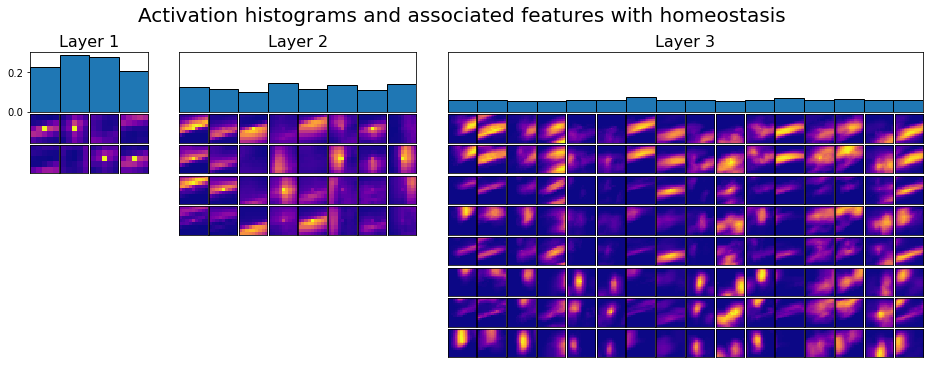

0.0


In [23]:
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

## 1.1 Testing different tauz

In [ ]:
for tau in [0.1, 0.5, 1, 2, 5, 10, 20, 50]:
    makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

## 1.2 Testing different architectures

In [ ]:
tau = 5
for nblayerz in [1, 2, 3]:
    for nbclust in [4, 8, 16]:
        makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# 2. Filtering all TS on the best results

In [ ]:
nblayerz = 3
nbclust =4

hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_filtall_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}.pkl'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learning1by1(filtering='all')
    with open(fname+'_model', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
        
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
        
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# 3. Stronger filter on the best results

In [ ]:
hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust, filt=5)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_filtallx5_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}.pkl'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learning1by1(filtering='all')
    with open(fname+'_model', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
        
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
        
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# 4. No homeostasis on the best results

In [ ]:
homeo = False
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# 5. Training all layers at the same time

In [ ]:
homeo = True

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_learnall_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learningall()
    with open(fname+'_model', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
        
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
        
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

In [ ]:
homeo = False

hotshom = network(krnlinit='first', tau=tau, homeo=homeo, nblay=nblayerz, nbclust= nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learningall()
    with open(fname+'_model', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
        
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

In [ ]:
homeo = True
for tau in [0.1, 0.5, 1, 2, 5, 10, 20]:
    hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learningall()
        with open(fname+'_model', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)

    if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
        trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order)
        testmaphom, loaderhom, _ = hotshom.testing(loaderhom, order, trainmaphom)
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
            pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
            trainmaphom, testmaphom = pickle.load(file)
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# 6. Training on more videos

In [ ]:
nb_train = 2000
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Activation maps

In [26]:
    hotshom = network(krnlinit=krnlinit, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learning1by1(dataset=dataset)
        with open(fname+'_model.pkl', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model.pkl', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)

../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_None_False_False


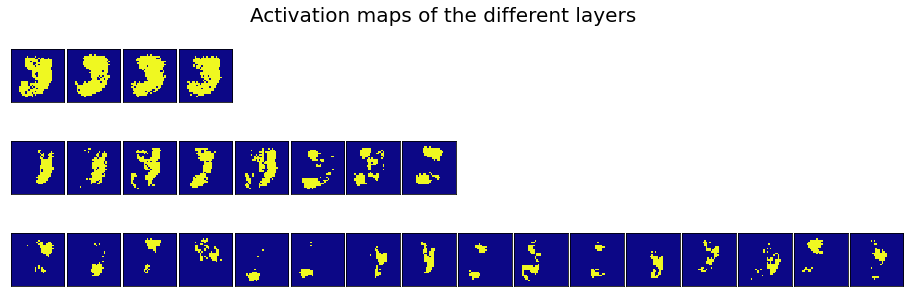

In [27]:
trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order, nb_digit = 1, to_record=True)
hotshom.plotactiv()

In [28]:
    hotshom = network(krnlinit=krnlinit, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_learnall_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learningall(dataset=dataset)
        with open(fname+'_model.pkl', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model.pkl', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)

../Records/EXP_03_NMNIST/2020-12-21_hots_learnall_nmnist_[4, 8, 16]_5_True_None_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


KeyboardInterrupt: 

In [ ]:
trainmaphom, loaderhom, _ = hotshom.training(loaderhom, order, nb_digit = 1, to_record=True)
hotshom.plotactiv()

# 7. Apply gaussian masking to the kernels

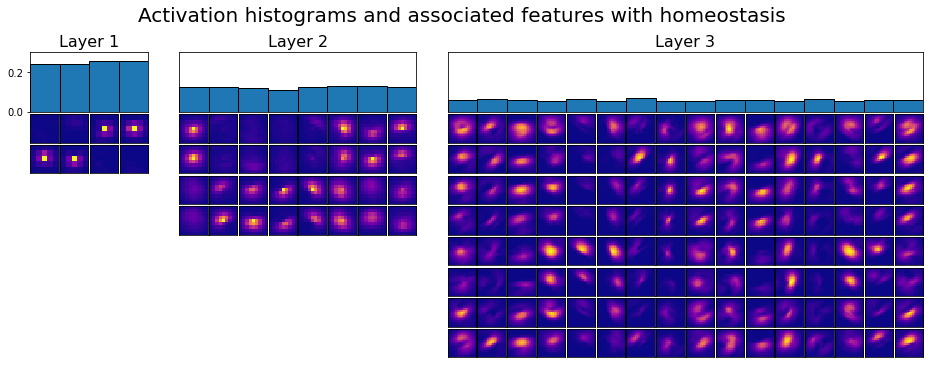

accuracy =  0.575


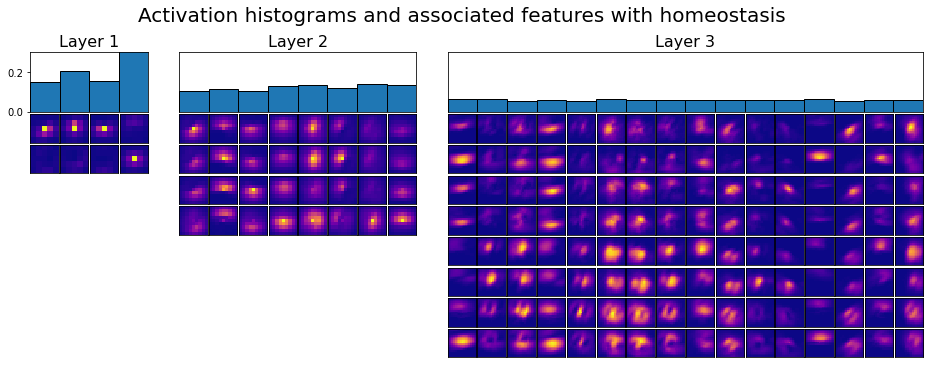

accuracy =  0.55


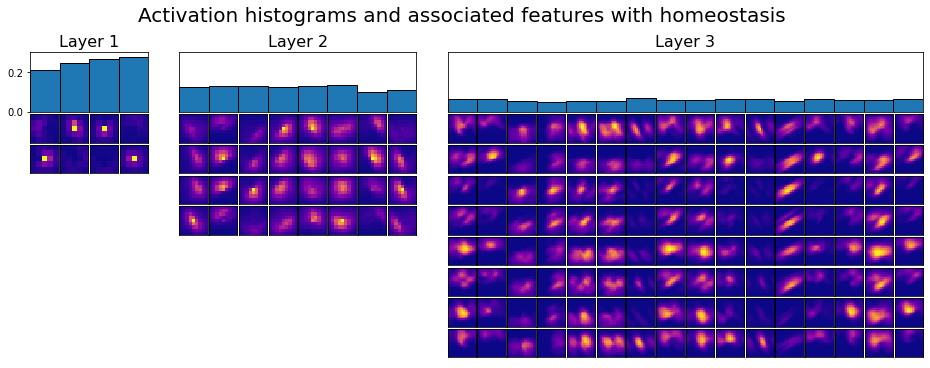

accuracy =  0.6


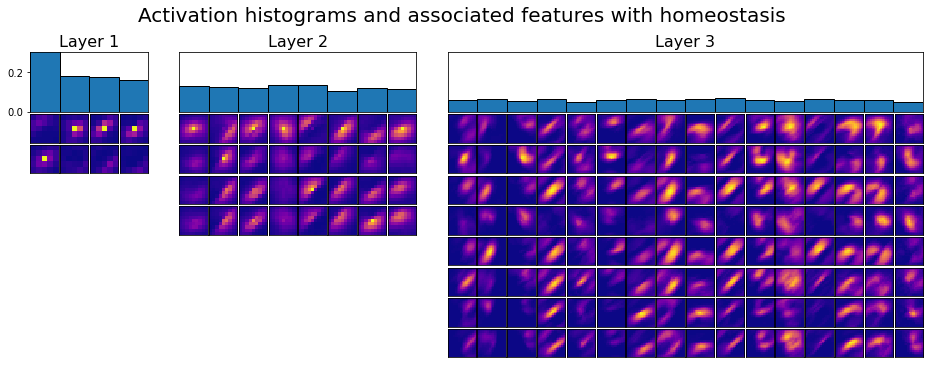

accuracy =  0.575


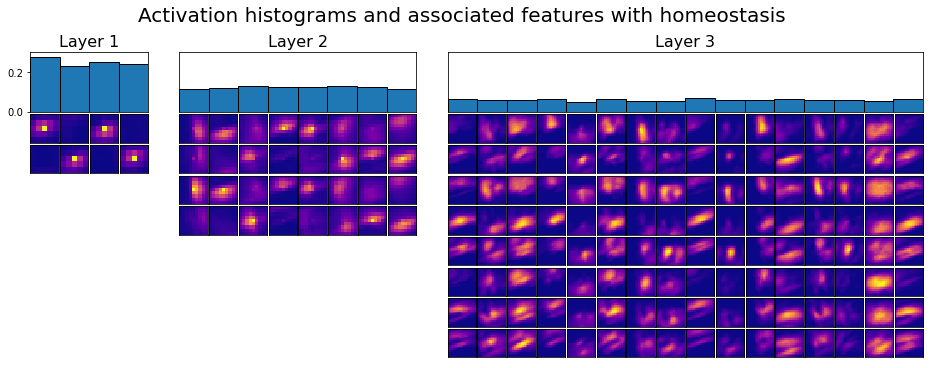

accuracy =  0.525


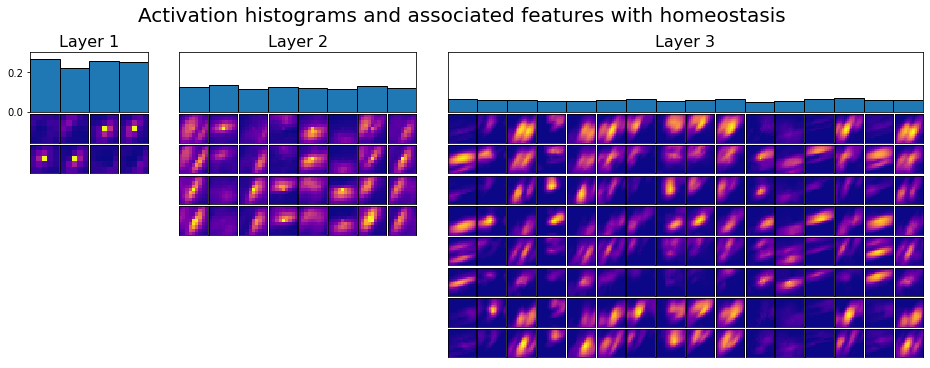

accuracy =  0.4


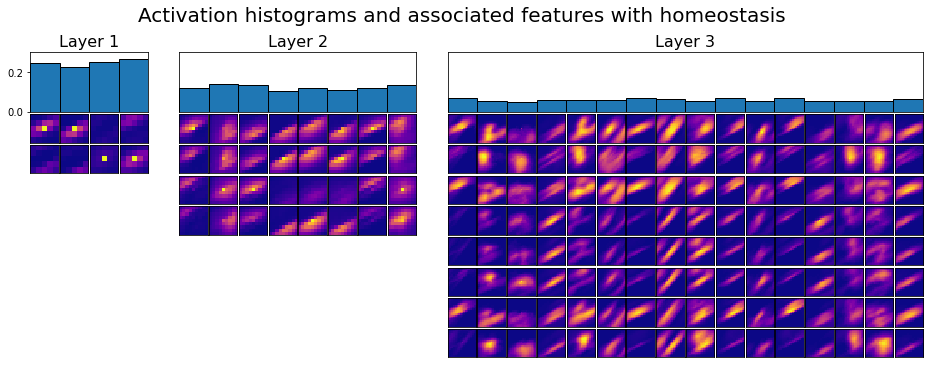

accuracy =  0.525


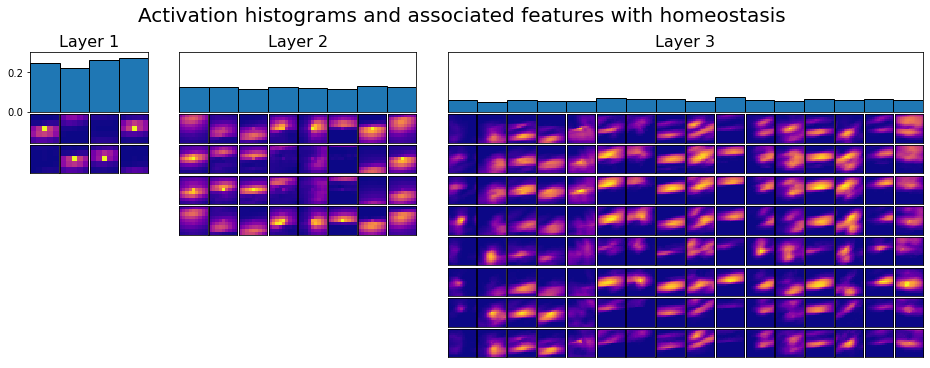

accuracy =  0.45


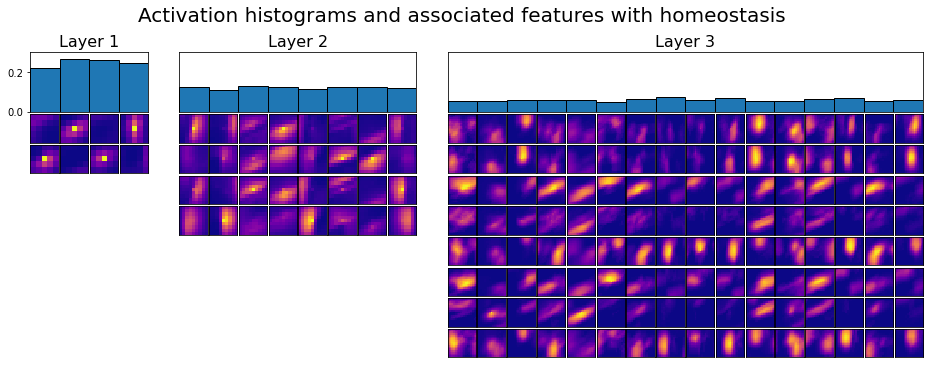

accuracy =  0.7


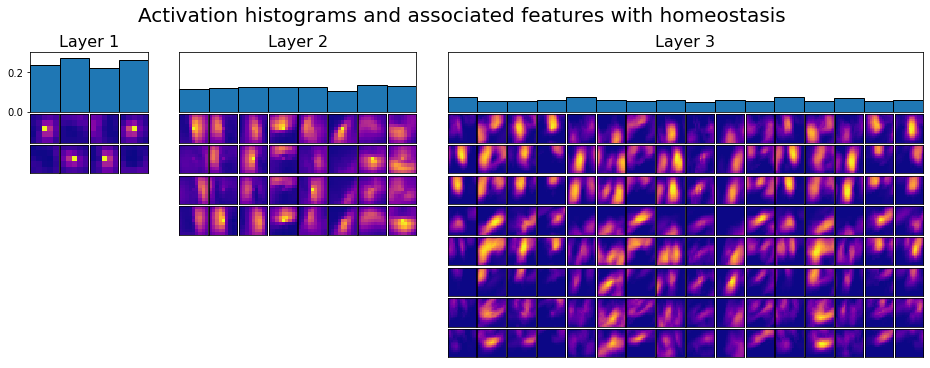

accuracy =  0.65


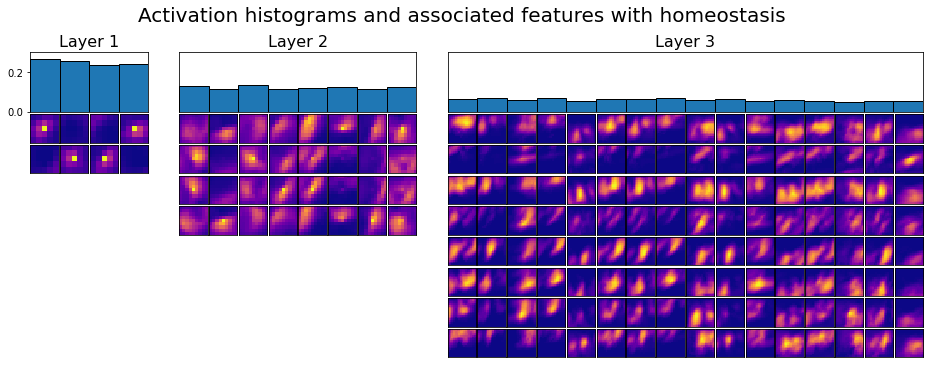

accuracy =  0.65


In [4]:
for sigma in np.arange(0.5,1.6,0.1):
    makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# 8. Add spatial jitter for pooling

In [ ]:
sigma = None
jitter = True
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# 9. Add translation invarianve preference

In [ ]:
jitter = False
homeinv = True
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);